In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
from openpyxl import Workbook
import pandas as pd
from bs4 import BeautifulSoup
import warnings 
warnings.filterwarnings('ignore')

In [2]:
driver = webdriver.Chrome("chromedriver.exe")
driver.maximize_window()
a=input("유튜브명 : ")
url = "https://www.youtube.com/results?search_query={}".format(a)
driver.get(url)
driver.implicitly_wait(3)
time.sleep(1.5) 
driver.refresh()
element = driver.find_element(By.ID, "text") 
element.click()
element = driver.find_element(By.LINK_TEXT, "동영상")
element.click()
time.sleep(3) 
last_height = driver.execute_script("return document.documentElement.scrollHeight")
num_scrolls = 4  
url_list = [] 

for i in range(num_scrolls): 
    #처음부터 끝까지 스크롤을 내려 해당내용 크롤링
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight)")
    time.sleep(1.5)
    # 스크롤을 내렸을 때 더 이상 내용이 없을 때
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    
    if new_height == last_height: 
        break
    
    html_source = driver.page_source  
    soup = BeautifulSoup(html_source, "html.parser")

# 동영상의 url이 포함된 요소를 찾기 
parent_elements = soup.find_all(class_ = 'yt-simple-endpoint style-scope ytd-playlist-thumbnail')
# 동영상의 요소의 href값을 추출해 저장하기
for parent_element in parent_elements:
    url = parent_element['href']
    url_list.append('https://www.youtube.com' + url)

# 저장된 url 리스트를 프린트 하시오
url_list=list(set(url_list))
print(url_list)

#유료 가입 광고 무시하기
try:
    driver.find_element_by_css_selector("#dismiss-button > a").click()
except:
    pass

유튜브명 : 한동숙tv
['https://www.youtube.com/watch?v=rrxD2AoevrM', 'https://www.youtube.com/watch?v=8EqtSkBbLDA', 'https://www.youtube.com/watch?v=Ar48Hf_nN-k', 'https://www.youtube.com/watch?v=yuBb7Fo-htU', 'https://www.youtube.com/watch?v=empL7YGuZtw', 'https://www.youtube.com/watch?v=9VdRNgfnymQ', 'https://www.youtube.com/watch?v=QGBJ2TgBU9M', 'https://www.youtube.com/watch?v=H7E1Yi6N1O8', 'https://www.youtube.com/watch?v=FZjRJ4mYy8g', 'https://www.youtube.com/watch?v=UPtNOXOMkbo', 'https://www.youtube.com/watch?v=5WhjavYoU6s', 'https://www.youtube.com/watch?v=9p0E33QLVzU', 'https://www.youtube.com/watch?v=XbEl-XEVNBo', 'https://www.youtube.com/watch?v=IUmXp5xzpFs', 'https://www.youtube.com/watch?v=at1Vpb7iWiY', 'https://www.youtube.com/watch?v=W8y_nbBAoVA', 'https://www.youtube.com/watch?v=Y1Nnlq90jnw', 'https://www.youtube.com/watch?v=CYpSUL9FeJo', 'https://www.youtube.com/watch?v=Po1e6XIx5Bk', 'https://www.youtube.com/watch?v=JL24Qu1SBGY', 'https://www.youtube.com/watch?v=3hbZVM3bxlM',

In [3]:
driver = webdriver.Chrome("chromedriver.exe")

urls=url_list[0:2]
id =[]
comment=[]

for url in urls:
    driver.get(url)
    driver.implicitly_wait(3)

    time.sleep(3)

    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")
        time.sleep(1.5)

        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

    time.sleep(1.5)

    try:
        driver.find_element_by_css_selector("#dismiss-button > a").click()
    except:
            pass
        
    html_source = driver.page_source
    soup = BeautifulSoup(html_source, 'html.parser')

    id_list = soup.select("div#header-author > h3 > #author-text > span")
    comment_list = soup.select("yt-formatted-string#content-text")
    for i, j in zip(id_list,comment_list):
        id.append(i)
        comment.append(j)

In [5]:
print(comment)

[<yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input=""><span class="style-scope yt-formatted-string" dir="auto">진짜 서넹님 들어오고 마트 시즌2 내내 개꿀잼이였음 ㅋㅋㅋㅋ</span><span class="style-scope yt-formatted-string" dir="auto">
</span><span class="style-scope yt-formatted-string" dir="auto">도박중독에 발주로 쿠사리주고 연봉협상 쿠사리 넣다가도 농협에대해선 따뜻함 ㅋㅋㅋㅋ</span></yt-formatted-string>, <yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input="">진짜 마크 고인물은 남다르네 ㅋㅋㅋㅋ 칸의 사업구상에 유능한 비서 겸 협업자 서넹이 뛰어드니 진짜 마트 발전 시너지 미쳤다</yt-formatted-string>, <yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input="">삼식이 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 요리사로 오니까 텐션 확 달라진 거 봐라 ㅋㅋㅋㅋㅋ 와중에 삼식이 팬텀 뽑았을 때 띵이 점프점프 하는 거 개귀엽네 ㅠㅠ</yt-formatted-string>, <yt-formatted-string class="style-scope ytd-comment-renderer" id="content-text" slot="content" split-lines="" user-input="">동숙 서넹 탬탬 

In [6]:
id_final = []
comment_final = []

for i in range(len(id)):
    temp_id = id[i].text
    temp_id = temp_id.replace('\n', '')
    temp_id = temp_id.replace('\t', '')
    temp_id = temp_id.replace('    ', '')
    id_final.append(temp_id) # 댓글 작성자

    temp_comment = comment[i].text
    temp_comment = temp_comment.replace('\n', '')
    temp_comment = temp_comment.replace('\t', '')
    temp_comment = temp_comment.replace('    ', '')
    comment_final.append(temp_comment) # 댓글 내용

In [7]:
# 저장된 내용을 아이디, 댓글 내용를 가지도록 dict으로 저장
pd_data = {"아이디" : id_final, "댓글 내용" : comment_final}

# 데이터 프레임으로 변환
youtube_pd = pd.DataFrame(pd_data)

# 데이터를 xlsx로 저장 index=False 데이터의 순서 번호 제거
youtube_pd.to_excel("dongsukan.xlsx", index=False)
df = pd.read_excel("dongsukan.xlsx")
df.to_csv("dongsukan.csv ", index=False, encoding="utf-8-sig")

In [8]:
df["아이디"]

0             @_10tacle36
1        @user-uu2sc5tf6n
2        @user-is9lw3kt9i
3        @user-nf8qz6es8g
4        @user-qy8ye1ev4j
              ...        
711      @user-up5be4zw9g
712      @user-jt7os5wh9g
713       @indigoblue4205
714          @HY3OKJJAE99
715      @user-ti3xu8ul4f
Name: 아이디, Length: 716, dtype: object

In [9]:
import matplotlib.font_manager as fm

for f in fm.fontManager.ttflist:
    if 'Nanum' in f.name:
        print(f.name, f.fname)

NanumGothic C:\Windows\Fonts\NanumGothic.ttf
NanumGothic C:\Windows\Fonts\NanumGothicBold.ttf
NanumMyeongjo C:\Windows\Fonts\NanumMyeongjoBold.ttf
NanumMyeongjo C:\Windows\Fonts\NanumMyeongjo.ttf
NanumGothic C:\Windows\Fonts\NanumGothicLight.ttf
NanumMyeongjo C:\Windows\Fonts\NanumMyeongjoExtraBold.ttf
NanumGothic C:\Windows\Fonts\NanumGothicExtraBold.ttf


In [10]:
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/NanumGothicExtraBold.ttf'

In [11]:
with open("stopwords.txt", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

In [12]:
stopwords

{'0순위임ㅋㅋㅋㅋㅋㅋㅋ',
 '10분안에',
 '1500만원',
 '1500이',
 '15칸을',
 '1황동수칸이될거라',
 '2000씨발',
 '20강이라하긴',
 '20강하기',
 '20분이지만',
 '20시간을',
 '20초반인데',
 '24시간동안',
 '2500까지',
 '2주만지나면',
 '2파티잔당은',
 '30몇시간',
 '35초전',
 '3만골짜리',
 '50만골이면',
 '5강으로',
 '5강이라고',
 '6황이아닌',
 '77돌도',
 '7개라는데',
 '8강엘라로',
 '97깍은거죠',
 '97깎아야지',
 '97깎였을때',
 '97돌4개',
 '97돌이',
 '97띄우고',
 'flay',
 'goat',
 'goat였어',
 'hala',
 'khan이다',
 'madrid',
 'mvp는',
 'mz호소인',
 'npc가',
 'siuuu',
 'siuuuuuuuuuuuuuu',
 'siuuuuuuuuuuuuuuuuuuuuuuuuu',
 'siuuuuuuuuu가',
 'ㄹㅇ',
 'ㄹㅇㅋㅋㅋ',
 'ㄹㅇ찐텐ㅋㅋㅋㅋ',
 'ㅅㅂㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅈㄴ웃겼음ㅋㄱㅋㅋㅋ',
 'ㅈㄴ웃기네',
 'ㅈㄴ웃기네ㅋㅋㅋ',
 'ㅈㄴ웃기네ㅋㅋㅋㅋㅋㅋ',
 'ㅈㄴ웃김',
 'ㅈㄴ잘깎네ㅋㅋㅋ',
 'ㅈ발렸죠',
 'ㅈ키타카',
 'ㅋㅋ',
 'ㅋㅋㅋ',
 'ㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋ2편기대',
 'ㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ8트하는거',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ',
 'ㅋㅋ

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# CSV 파일을 pandas 데이터프레임으로 읽어옴
df = pd.read_csv('dongsukan.csv',encoding='utf-8')

# 댓글 내용이 저장된 컬럼 선택
comment_col = '댓글 내용'
comment_list = df[comment_col].tolist()
new_list = []
for x in comment_list:
    new_list.append(str(x))

# 모든 댓글 내용을 하나의 문자열로 결합
text = ' '.join(new_list)

In [14]:
text

'진짜 서넹님 들어오고 마트 시즌2 내내 개꿀잼이였음 ㅋㅋㅋㅋ도박중독에 발주로 쿠사리주고 연봉협상 쿠사리 넣다가도 농협에대해선 따뜻함 ㅋㅋㅋㅋ 진짜 마크 고인물은 남다르네 ㅋㅋㅋㅋ 칸의 사업구상에 유능한 비서 겸 협업자 서넹이 뛰어드니 진짜 마트 발전 시너지 미쳤다 삼식이 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 요리사로 오니까 텐션 확 달라진 거 봐라 ㅋㅋㅋㅋㅋ 와중에 삼식이 팬텀 뽑았을 때 띵이 점프점프 하는 거 개귀엽네 ㅠㅠ 동숙 서넹 탬탬 조합 너무 힐링된다 미소가 멈추질 않네 칸나로마트를 되살리기 위해 노력한 방장과 요룡인들... 많은 도움으로 농장 살리고 다시 칸나로마트 정상영업한건 레전드야 개웃겼어 형 시점에서 북괴물쥐 테러 보고 싶었는데 그게 아쉽다 진짜 칸넴은 스토리 만드는거는 트위치 뿐만 아니라 전체 인방인들 사이에서 원탑임 진짜 잘나갈적에 리타님하고 복어햄한테 통크게 베풀던게 이렇게 또 스토리가 이어지는게 레전드야 ㅋㅋㅋ 진짜 뭘하든 될 사람이다.. 이 정도에 포부가 있어서 성공한거다 그는 도대체,. 마트부셔지고 노잼되나 했는데 마트2열고 일잘하는 직원하나 들어오니까 더 꿀잼됨ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 서넹폼 미침ㅋㅋㅋㅋㅋㅋㅋㅋ 그동안 많은 마크 방송이 있었지만 이런 스토리와 서사를 갖춘 방송인이 또 있을까..? 칸나로마트는 석식으로 나온 쏘야같은 존재… 진짜 탬탬 등장할 때마다 분위기가 사르르 녹아내리네ㅋㅋ 앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ진짜 마트 경영 너무 재밌어요 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ일 잘하시는 서넹님도 든든하고 웨이팅 기다리시는 탬탬님도 귀여우시고 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ강지님 합류에 제가 다 속이 뻥~ 뚫리는 기분이네요~! 복어님이 오대기 출동라인 만드는것도 개웃겼는데 꿀잼포인트가 너무 많아서 기다릴수가 없다 편집자님 저희는 건강하니까 걱정말고 계속 올려주세요 시작할때 감성 터지네 ㅋㅋㅋㅋㅋㅋㅋ 농장의 천장이 이리도 높았던가 ㅋㅋㅋㅋㅋㅋㅋㅋ 칸형 마크는 ㄹㅇ 다 레전드인듯 이거 때매 요즘 잠 못자는데도 너무 행복함 ㅋㅋㅋ 평생 마크 이렇게 재밌게 본적에 없는데 덕

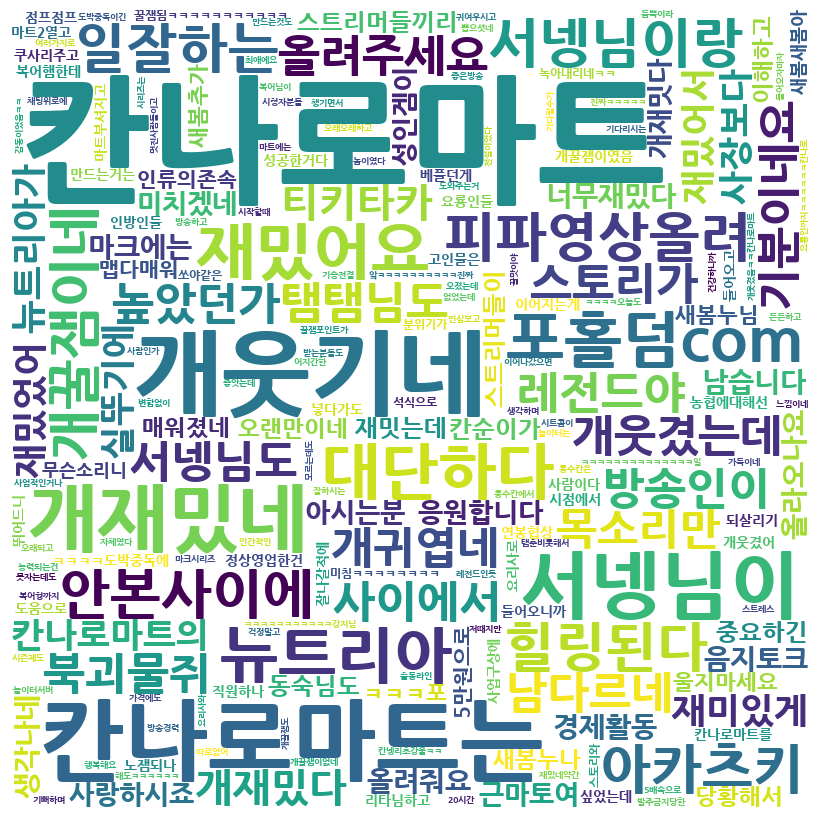

In [15]:
# 워드 클라우드 생성
wordcloud = WordCloud(font_path=font_path,width=800, height=800,
                      background_color='white',stopwords=stopwords, min_word_length=4).generate(text)

# 단어의 빈도 계산
wordcloud.generate_from_frequencies(wordcloud.process_text(text.lower()))
word_freq = wordcloud.process_text(text.lower())

# 워드 클라우드 출력
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

# 파일로 저장
plt.savefig('wordcloud.png')


In [16]:
##문제 정답

# 해당 숫자보다 낮은 빈도의 단어를 도출함
word_num = {}
for word, freq in word_freq.items():
    if freq < 3: # 해당 단어의 빈도수 보다 낮은 단어 도출
        word_num[word] = freq

# 낮은 빈도의 단어를 프린트함
for word, frequency in word_num.items():
    print(("{}").format(word))

들어오고
개꿀잼이였음
ㅋㅋㅋㅋ도박중독에
쿠사리주고
연봉협상
넣다가도
농협에대해선
고인물은
남다르네
사업구상에
뛰어드니
요리사로
점프점프
개귀엽네
칸나로마트를
되살리기
요룡인들
도움으로
정상영업한건
레전드야
개웃겼어
시점에서
북괴물쥐
싶었는데
만드는거는
인방인들
사이에서
잘나갈적에
리타님하고
복어햄한테
베풀던게
스토리가
이어지는게
사람이다
성공한거다
마트부셔지고
노잼되나
마트2열고
직원하나
들어오니까
꿀잼됨ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
미침ㅋㅋㅋㅋㅋㅋㅋㅋ
스토리와
방송인이
석식으로
쏘야같은
분위기가
녹아내리네ㅋㅋ
앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ진짜
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ일
잘하시는
서넹님도
든든하고
기다리시는
탬탬님도
귀여우시고
ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ강지님
기분이네요
복어님이
출동라인
만드는것도
개웃겼는데
꿀잼포인트가
기다릴수가
건강하니까
걱정말고
올려주세요
시작할때
높았던가
레전드인듯
못자는데도
챙기면서
변함없이
목소리만
가득이네
칸넹리초강울ㅋㅋ
복어형까지
개웃겼음ㅋㅋ칸나로마트
탬춘비롯해서
도와주는거
감동이었음ㅋㅋ
놀이터서버
좋은방송
시청자분들
오래오래하고
시즌제도
이어나갔으면
방송경력
오래되고
민심보고
능력되는건
스트레스
받는분들도
ㅋㅋㅋㅋ오늘도
20시간
방송하고
듬뿍이라
롱수칸은
전설이었다
5배속으로
어지간한
없었는데
마크시리즈
행복해요
시트콤이
따로없어
꿀맛이야
재밌네약간
발주금지당한
느낌이네
요룡인까지ㅋㅋㅋㅋㅋㅋ칸나로
마트에는
시리즈는
놀이터는
모르는데도
개꿀잼도
개꿀잼이없네
개재밌다
진짜ㅋㅋㅋㅋㅋ
좋앗는데
여러가지로
놈이였다
저때지만
가격에도
기뻐하며
요리사와
생각하며
자체였다
최애에요
뽑으셧네
도박중독이긴
해도ㅋㅋㅋㅋㅋㅋ
사람인가
기승전결
사업적인거나
인간적인
멋진사람들이고
들어오자마자
채팅위로에
롱수칸에서
오졌는데
ㅋㅋㅋㅋㅋㅋ칸나로마트를
전설속의
주인의식을
개인으로
ㅋㅋㅋㅋㅋ시즌1때도
힐링되는기분이네요
탕진하고
휩싸여서
흑화할때
감다뒤긴해ㅋㅋㅋ
유통으로
부가가치
인정합니다
마크를안하는유저인데도
재밌게보고있어욬ㅋㅋㅋㅋㅋㅋ
방송천재
미친편집자실력
스트리머계의
단짠단짠


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

In [30]:
def train_sentiment_analysis_model(positive_file, negative_file):
    # 긍정 단어와 부정 단어를 읽어서 리스트로 변환합니다.
    with open(positive_file, 'r', encoding='utf-8') as f:
        positive_words = f.read().splitlines()

    with open(negative_file, 'r', encoding='utf-8') as f:
        negative_words = f.read().splitlines()

    # 긍정적인 문장과 부정적인 문장을 학습 데이터로 생성합니다.
    positive_sentences = [" ".join(positive_words)] * len(positive_words)
    negative_sentences = [" ".join(negative_words)] * len(negative_words)

    # 학습 데이터와 레이블을 생성합니다.
    X = positive_sentences + negative_sentences
    y = [1] * len(positive_sentences) + [0] * len(negative_sentences)

    # CountVectorizer를 사용하여 단어의 빈도수를 측정합니다.
    vectorizer = CountVectorizer(token_pattern=r"\b\w+\b") 
    X = vectorizer.fit_transform(X)

    # LogisticRegression을 사용하여 모델을 학습합니다.
    clf = MultinomialNB()
    clf.fit(X, y)

    return vectorizer, clf

In [31]:
def predict_sentiment_analysis(text, vectorizer, clf):
    # 입력된 텍스트를 벡터화합니다.
    X = vectorizer.transform([text])

    # 모델을 사용하여 감성을 예측합니다.
    y_pred = clf.predict(X)

    # 예측 결과에 따라 출력 메시지와 카운트 정보를 선택합니다.
    if y_pred[0] == 1:
        result = {"sentiment": "긍정적인 단어", "positive_count": 1, "negative_count": 0}
    else:
        result = {"sentiment": "부정적인 단어", "positive_count": 0, "negative_count": 1}

    # 입력된 텍스트에 포함된 긍정 단어와 부정 단어를 카운트합니다.
    for word in text.split():
        if word in positive_words:
            result["positive_count"] += 1
        elif word in negative_words:
            result["negative_count"] += 1

    return result

In [32]:
with open('positive_word.txt', 'r',encoding='utf-8') as f:
    positive_words = f.read().splitlines()

with open('negative_word.txt', 'r',encoding='utf-8') as f:
    negative_words = f.read().splitlines()

In [35]:
vectorizer, clf=train_sentiment_analysis_model("positive_word.txt","negative_word.txt")
text = input("분석할 문자열을 입력하세요: ")

predict_sentiment_analysis(text, vectorizer, clf)

분석할 문자열을 입력하세요: 칸나로마트를 되살리기 위해 노력한 방장과 요룡인들... 많은 도움으로 농장 살리고 다시 칸나로마트 정상영업한건 레전드야 개웃겼어 형 시점에서 북괴물쥐 테러 보고 싶었는데 그게 아쉽다


{'sentiment': '부정적인 단어', 'positive_count': 0, 'negative_count': 1}